In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from calendar import monthrange
from datetime import datetime, timedelta
from collections import OrderedDict
%matplotlib inline

### Stuff for visiualizing and normalizing 

In [2]:
dates = ["2014-01-01", "2017-01-01"]
start, end = [datetime.strptime(_, "%Y-%m-%d") for _ in dates]
months_datetime = OrderedDict(((start + timedelta(_)).strftime(r"%b-%y"), None) for _ in xrange((end - start).days)).keys()

months = []
for i in range(36):
    months.append(i+1)
    
days_in_the_month = []
for year in [2014, 2015, 2016]:
    for month in [1,2,3,4,5,6,7,8,9,10,11,12]:
        days_in_the_month.append(monthrange(year, month)[1])

In [3]:
def averaging(df, day_counter_list):
    begin = 0
    for i in range(len(df)):
        if ((type(df.iloc[0, i]) != str) and (type(df.iloc[0, i]) != tuple)):
            begin = i
            break
    tmp = df.copy()
    for i in range(len(day_counter_list)):
        tmp.iloc[:,i+begin] = df.iloc[:,i+begin] / days_in_the_month[i]
    return tmp

In [29]:
def plotting_monthly(df, how_many_rows, column_for_legend, y_label, the_title, plot_legend='no', save_fig='no'):
    begin = 0
    for i in range(len(df)):
        if ((type(df.iloc[0, i]) != str) and (type(df.iloc[0, i]) != tuple)):
            begin = i
            break
    
    plt.figure(figsize=(20,10))

    for i in range(how_many_rows):
        plt.plot(months, df.iloc[i, begin:-1], label=df[column_for_legend][i], linewidth=3.0)

    plt.xlim([1,36])
    my_xticks = months_datetime
    plt.xticks(months, my_xticks, rotation='vertical', size=18)


    plt.yticks(size=18)
    plt.ylabel(y_label, size = 25)
    plt.title(the_title, size=30)

    if plot_legend != 'no':
        legend=plt.legend(loc=(1.05,0.05))
        plt.setp(plt.gca().get_legend().get_texts(), fontsize='30')
    
    if ((save_fig != 'no') and (plot_legend != 'no')):
        plt.savefig("../Data/pictures/" + save_fig +".png", bbox_extra_artists=(legend,), bbox_inches='tight')
        
    elif save_fig != 'no':
        plt.savefig("../Data/pictures/" + save_fig +".png")
    
    plt.show()

In [5]:
def plotting_routes(df, range_to_plot, column_for_legend, bool_plot_legend, y_label):
    plt.figure(figsize=(20,10))

    for i in range(range_to_plot):
        plt.plot(months, df.iloc[i, 2:], label=df[column_for_legend][i], linewidth=3.0)

    plt.xlim([2,37])
    my_xticks = months_datetime
    plt.xticks(months, my_xticks, rotation='vertical', size=18)


    plt.yticks(size=18)
    plt.ylabel(y_label, size = 25)

    if bool_plot_legend == 1:
        legend=plt.legend(loc=(1.05,0.05))
        plt.setp(plt.gca().get_legend().get_texts(), fontsize='30') #legend 'list' fontsize

    plt.show()

### Cities 

In [31]:
# reading in monthlycity data, creating sum column, creating a separate
# df with average values per month and reordering based on sum column
city_count_df = pd.read_csv('../Data/MonthlyCity.csv')
city_count_df.drop(['Unnamed: 0'], axis=1, inplace=True)
city_count_df.fillna(0, inplace=True)

city_averaged_df = averaging(city_count_df, days_in_the_month)

city_count_df['sum'] = 0
city_count_df['sum'] = city_count_df.sum(axis=1)
city_averaged_df['sum'] = city_count_df['sum']
#city_averaged_df['sum'] = city_count_df.sum(axis=1)

city_count_df.sort_values(by='sum', ascending=False, inplace=True)
city_count_df.reset_index(drop=True, inplace=True)
city_averaged_df.sort_values(by='sum', ascending=False, inplace=True)
city_averaged_df.reset_index(drop=True, inplace=True)

In [32]:
plotting_monthly(
    city_count_df, len(city_count_df), 'City', 'No. Flights', 
    'Number of flights a month, all cities', 
    plot_legend = 'no', save_fig='monthly_flights_all_cities')

In [33]:
plotting_monthly(
    city_count_df, 8, 'City', 'No. Flights', 
    'Number of flights a month, 8 busiest cities', 
    'yes', '8_busiest_cities_monthly')

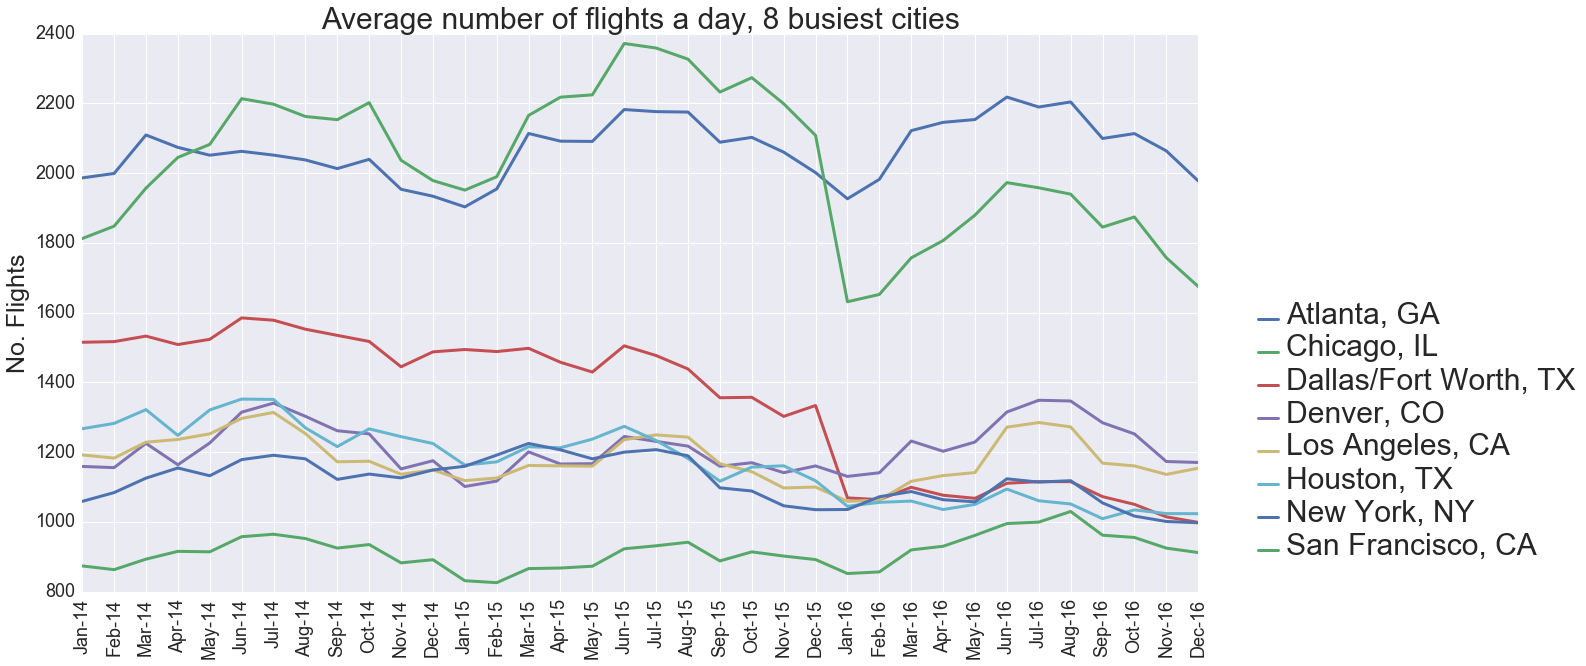

In [34]:
plotting_monthly(
    city_averaged_df, 8, 'City', 'No. Flights', 
    'Average number of flights a day, 8 busiest cities', 
    'yes', '8_busiest_cities_monthly_normalized')

### Airports

In [35]:
airport_count_df = pd.read_csv('../Data/MontlyAirportTotal.csv')
airport_count_df.drop(['Unnamed: 0'], axis=1, inplace=True)
airport_count_df.fillna(0, inplace=True)

airport_averaged_df = averaging(airport_count_df, days_in_the_month)

airport_count_df['sum'] = 0
airport_count_df['sum'] = airport_count_df.sum(axis=1)
airport_averaged_df['sum'] = airport_count_df['sum']

airport_count_df.sort_values(by='sum', ascending=False, inplace=True)
airport_count_df.reset_index(drop=True, inplace=True)
airport_averaged_df.sort_values(by='sum', ascending=False, inplace=True)
airport_averaged_df.reset_index(drop=True, inplace=True)

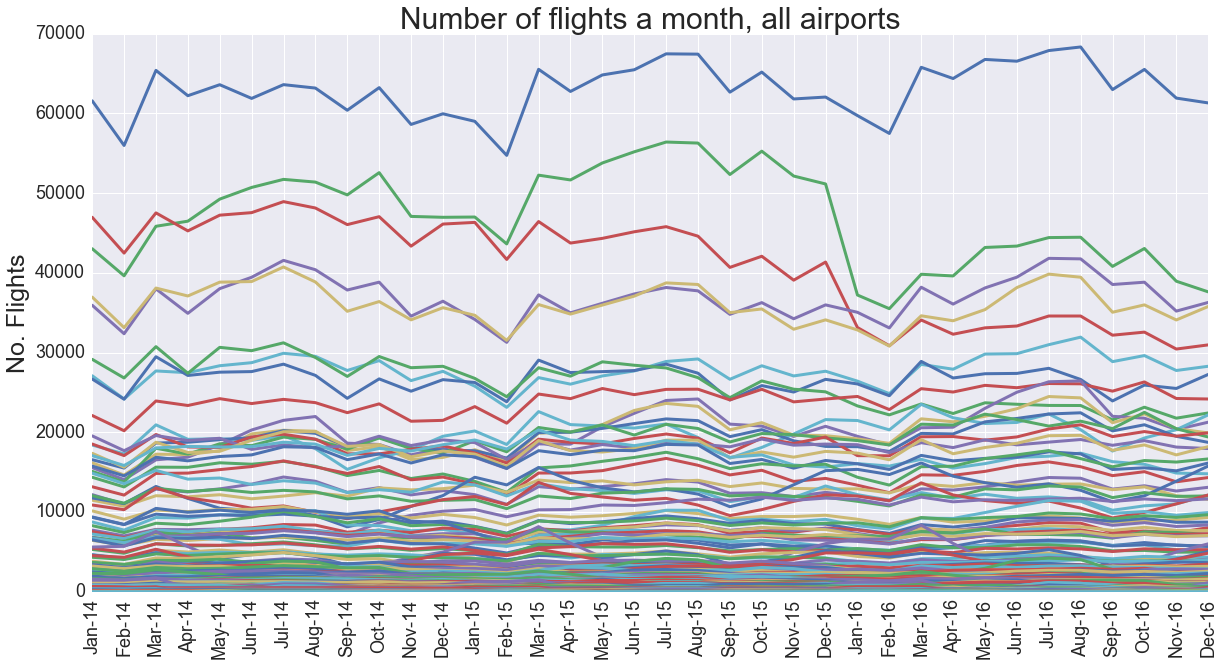

In [36]:
plotting_monthly(airport_count_df, len(airport_count_df), 
                 'Airport', 'No. Flights', 'Number of flights a month, all airports',
                'no', 'monthly_flights_all_airports')

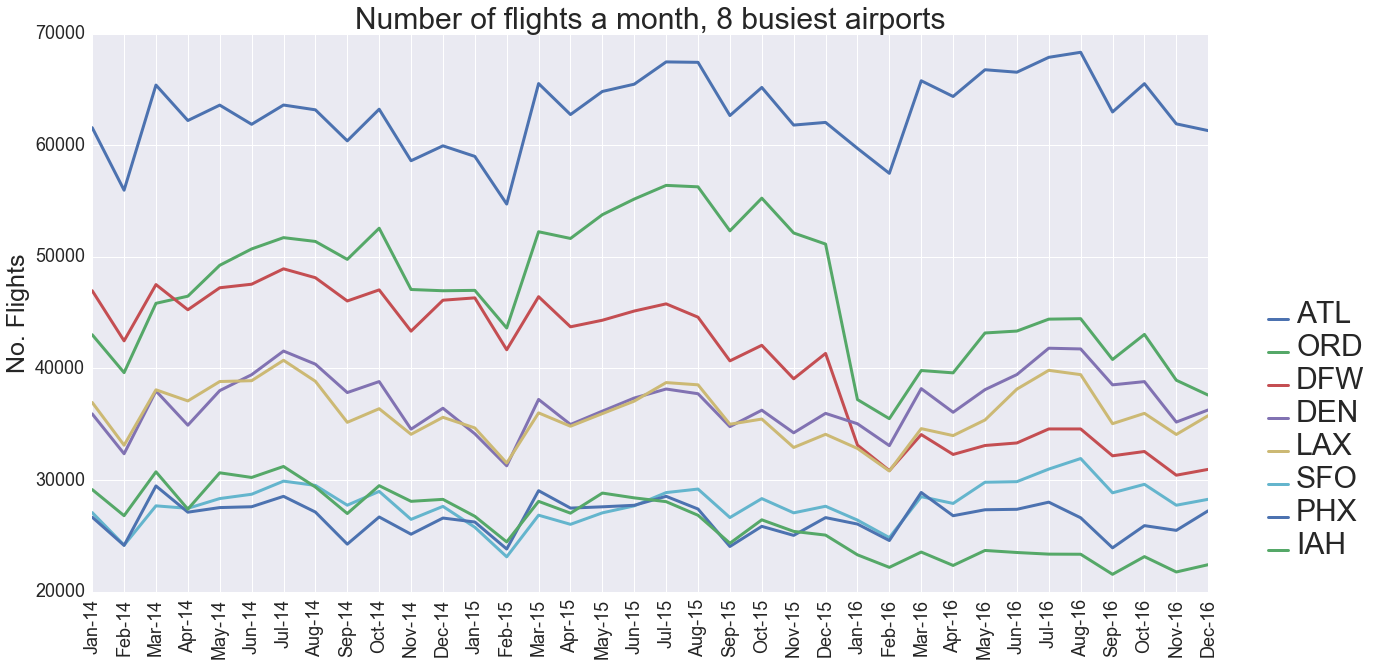

In [37]:
plotting_monthly(airport_count_df, 8, 
                 'Airport', 'No. Flights', 'Number of flights a month, 8 busiest airports', 
                 'yes', '8_busiest_airports_monthly')

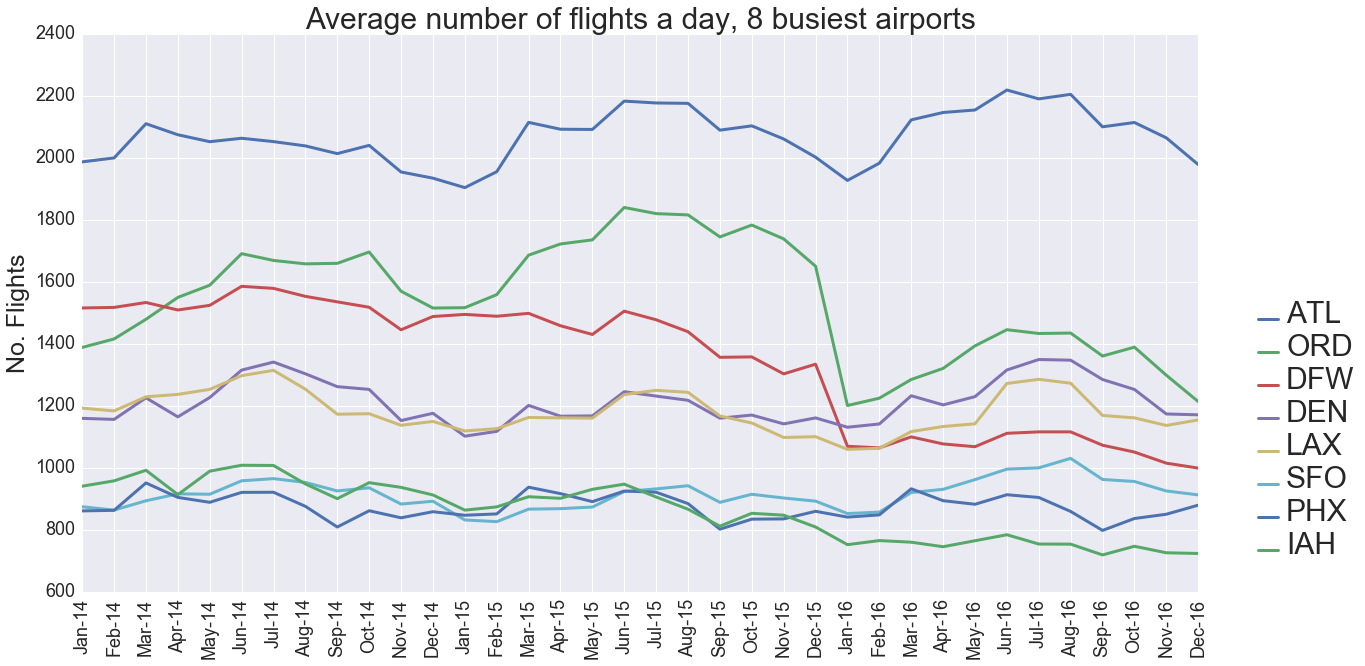

In [38]:
plotting_monthly(airport_averaged_df, 8,
                 'Airport', 'No. Flights', 'Average number of flights a day, 8 busiest airports', 
                 'yes', '8_busiest_airports_monthly_normalized')

### Routes 

In [39]:
routes_count_df = pd.read_csv('../Data/MonthlyRoutes.csv')
routes_count_df.drop(['Unnamed: 0'], axis=1, inplace=True)
routes_count_df.fillna(0, inplace=True)

routes_count_df['Airports'] = 0
cols = routes_count_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
routes_count_df = routes_count_df[cols]

routes_count_df.ROUTE = routes_count_df.ROUTE.replace({'\'': '%'}, regex=True)

for i in range(len(routes_count_df)):
    airports = re.findall(r'\%([^%]*)\%', routes_count_df.ROUTE[i])
    routes_count_df['Airports'][i] = airports[0],airports[1]
    
routes_count_df.drop(['ROUTE'], axis=1, inplace=True)

routes_averaged_df = averaging(routes_count_df, days_in_the_month)

routes_count_df['sum'] = 0
routes_count_df['sum'] = routes_count_df.sum(axis=1)
routes_averaged_df['sum'] = routes_count_df['sum']

routes_count_df.sort_values(by='sum', ascending=False, inplace=True)
routes_count_df.reset_index(drop=True, inplace=True)
routes_averaged_df.sort_values(by='sum', ascending=False, inplace=True)
routes_averaged_df.reset_index(drop=True, inplace=True)

C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


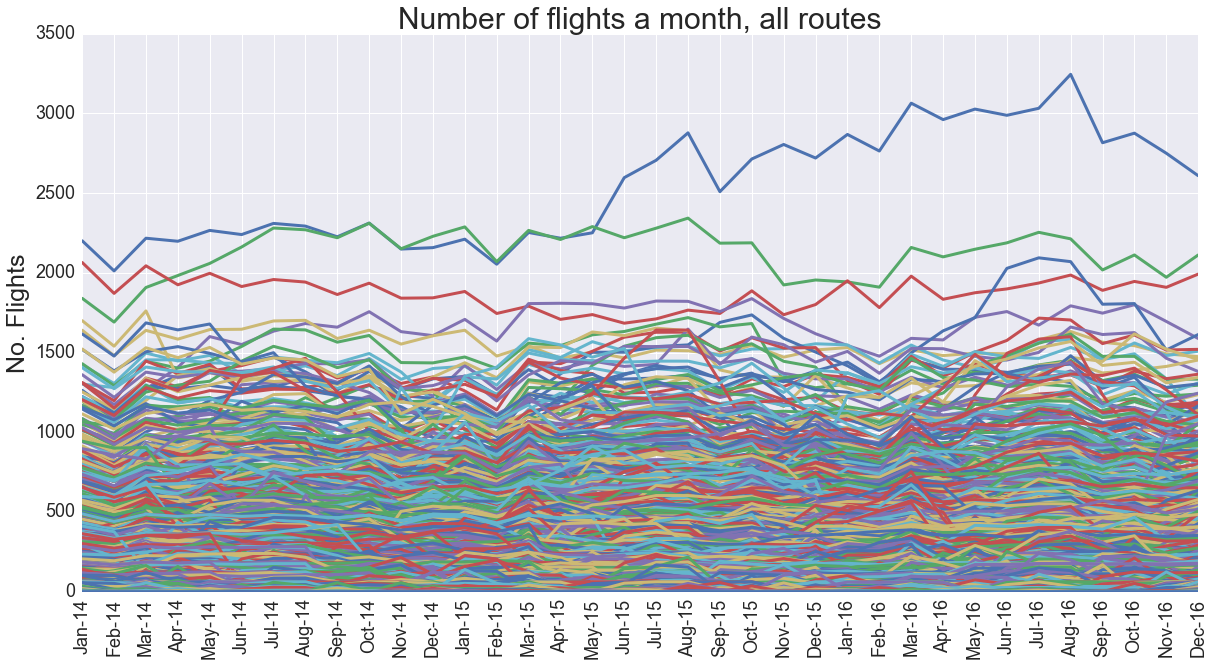

In [40]:
plotting_monthly(routes_count_df, len(routes_count_df), 
    'Airports', 'No. Flights', 'Number of flights a month, all routes',
                'no', 'all_routes_monthly')

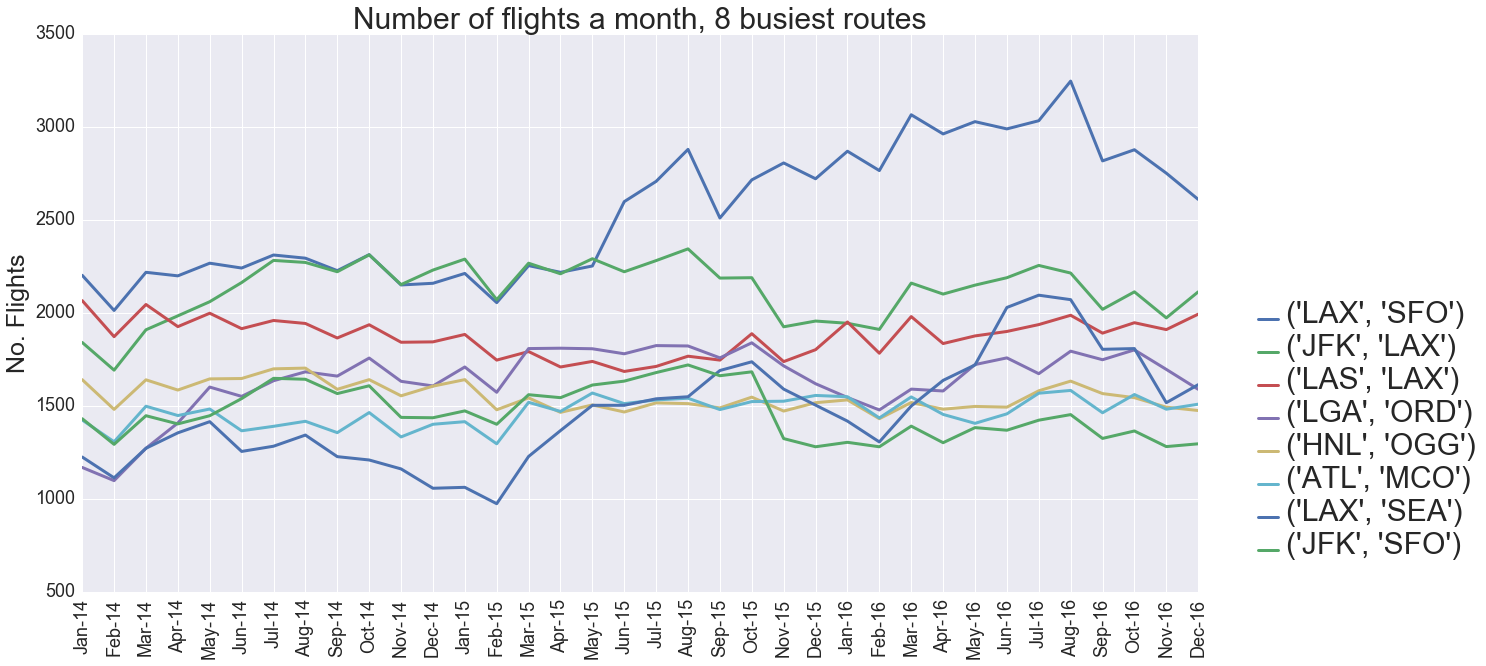

In [41]:
plotting_monthly(
    routes_count_df, 8, 'Airports', 'No. Flights', 'Number of flights a month, 8 busiest routes', 
    'yes', '8_busiest_routes_monthly')

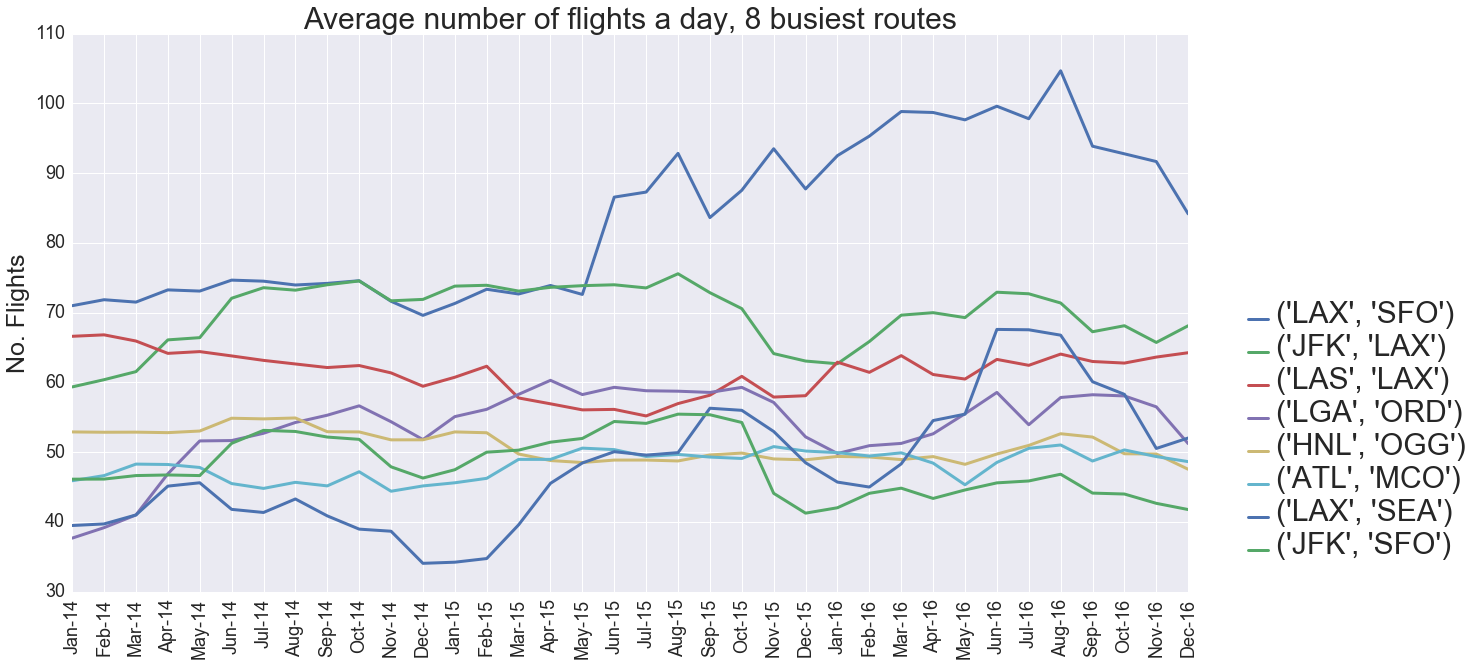

In [42]:
plotting_monthly(
    routes_averaged_df, 8, 'Airports', 'No. Flights', 'Average number of flights a day, 8 busiest routes', 
    'yes', '8_busiest_routes_monthly_averaged')

## By day data 

In [43]:
airport_per_day = pd.read_csv('../Data/busiest_airport_by_day.csv')
routes_count_df.fillna(0, inplace=True)
airport_per_day.drop(['Unnamed: 0'], axis=1, inplace=True)

In [209]:
airport_per_day.loc[329] = 0
airport_per_day.loc[329] = airport_per_day.sum()

In [210]:
airport_per_day.tail()

Airport  2014-01-01  2014-01-02  2014-01-03  2014-01-04  2014-01-05  \
325     DTW       364.0       507.0       505.0       438.0       491.0   
326     GRB        20.0        22.0        24.0        20.0        26.0   
327     IAG         NaN         NaN         NaN         NaN         NaN   
328     IND       123.0       154.0       154.0       134.0       156.0   
329     NaN     28244.0     33377.0     33451.0     29088.0     31794.0   

     2014-01-06  2014-01-07  2014-01-08  2014-01-09     ...      2016-12-22  \
325       526.0       502.0       524.0       538.0     ...           604.0   
326        22.0        22.0        22.0        24.0     ...            14.0   
327         NaN         NaN         NaN         NaN     ...             4.0   
328       154.0       140.0       148.0       156.0     ...           150.0   
329     33068.0     30419.0     30792.0     32012.0     ...         32066.0   

     2016-12-23  2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
325       602.0       424.0       403.0       615.0       613.0       609.0   
326        14.0        13.0        11.0        14.0        14.0        14.0   
327         4.0         4.0         4.0         4.0         4.0         4.0   
328       144.0        89.0       108.0       147.0       150.0       148.0   
329     32084.0     23980.0     24329.0     32086.0     31998.0     31908.0   

     2016-12-29  2016-12-30  2016-12-31  
325       601.0       596.0       419.0  
326        14.0        14.0        10.0  
327         4.0         4.0         4.0  
328       145.0       147.0        89.0  
329     31712.0     31764.0     24092.0  

[5 rows x 1097 columns]

In [217]:
flights_per_day_average = sum(airport_per_day.iloc[329,1:])/1097
print "average number of flights a day: %d" %flights_per_day_average

average number of flights a day: 31460


## Increase and decrease 

In [44]:
def plotting_monthly_II(df, how_many_rows, column_for_legend, y_label, the_title, plot_legend='no', save_fig='no'):
    begin = 0
    for i in range(len(df)):
        if ((type(df.iloc[0, i]) != str) and (type(df.iloc[0, i]) != tuple)):
            begin = i
            break
    
    plt.figure(figsize=(20,10))

    for i in range(how_many_rows):
        plt.plot(months, df.iloc[i, begin:-2], label=df[column_for_legend][i], linewidth=3.0)

    plt.xlim([1,36])
    my_xticks = months_datetime
    plt.xticks(months, my_xticks, rotation='vertical', size=18)


    plt.yticks(size=18)
    plt.ylabel(y_label, size = 25)
    plt.title(the_title, size=30)

    if plot_legend != 'no':
        legend=plt.legend(loc=(1.05,0.05))
        plt.setp(plt.gca().get_legend().get_texts(), fontsize='30')
    
    if ((save_fig != 'no') and (plot_legend != 'no')):
        plt.savefig("../Data/pictures/" + save_fig +".png", bbox_extra_artists=(legend,), bbox_inches='tight')
        
    elif save_fig != 'no':
        plt.savefig("../Data/pictures/" + save_fig +".png")
    
    plt.show()

In [45]:
airport_count_df['difference'] = 0
for i in range(len(airport_count_df)):
    airport_count_df['difference'][i]  = airport_count_df['36'][i] - airport_count_df['1'][i]
    #airport_count_df.sum['difference'][i] = num

C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [46]:
airport_count_df.sort_values(by='difference', inplace=True)
airport_count_df.reset_index(drop=True, inplace=True)

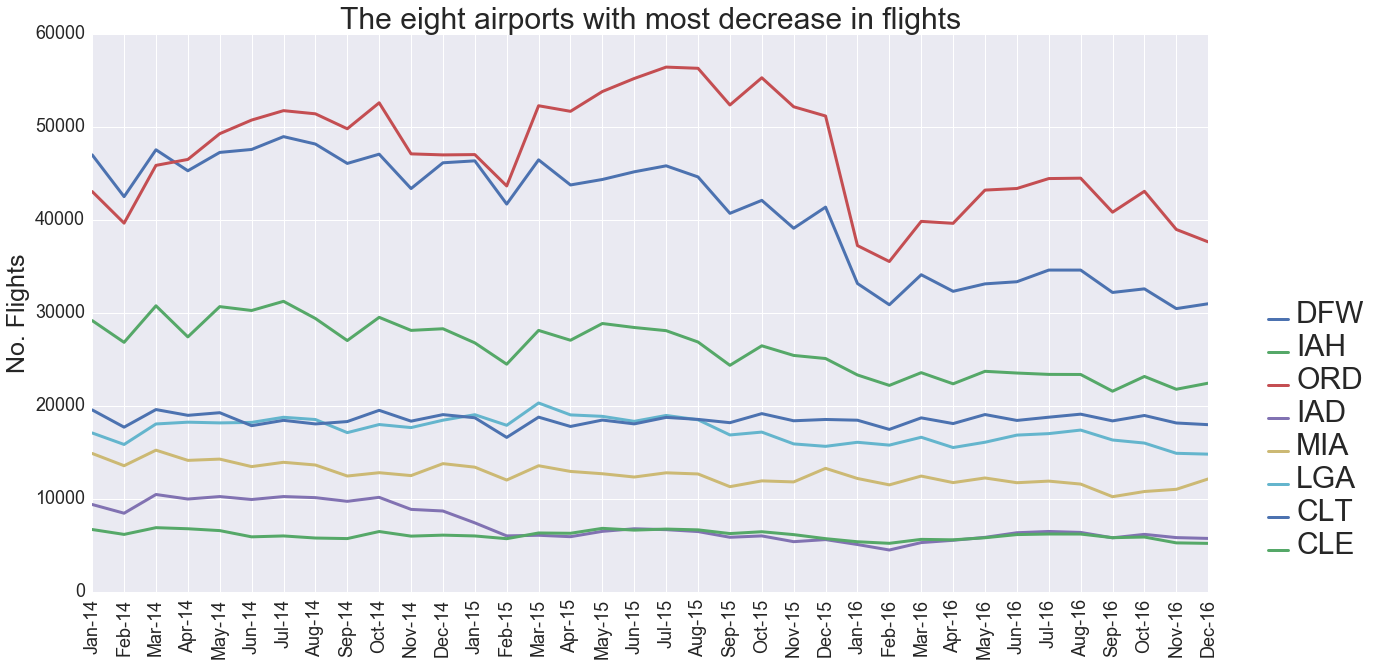

In [47]:
plotting_monthly_II(airport_count_df, 8, 'Airport', 'No. Flights', 'The eight airports with most decrease in flights', 
                    'yes', 'decrease_airports')

In [48]:
airport_count_df.sort_values(by='difference', inplace=True, ascending=False)
airport_count_df.reset_index(drop=True, inplace=True)

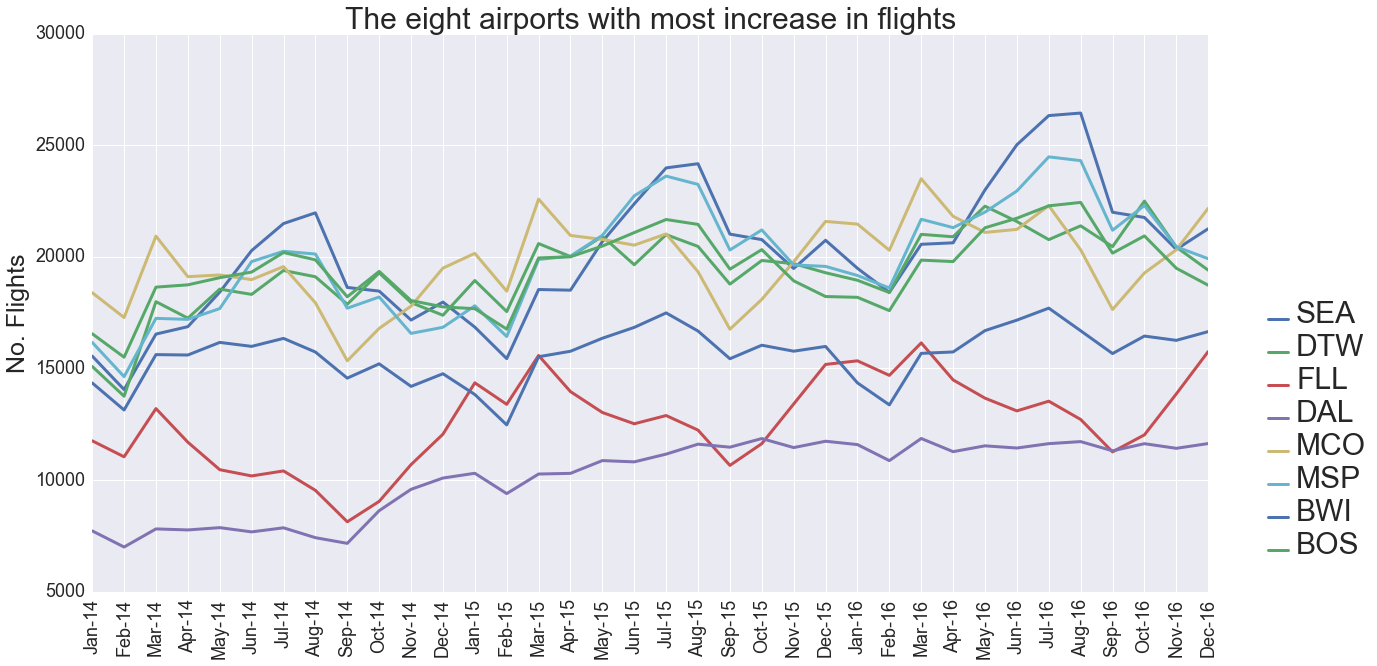

In [49]:
plotting_monthly_II(airport_count_df, 8, 'Airport', 'No. Flights', 'The eight airports with most increase in flights', 
                    'yes', 'increase_airports')

### City 

In [50]:
city_count_df['difference'] = 0
for i in range(len(city_count_df)):
    city_count_df['difference'][i]  = city_count_df['36'][i] - city_count_df['1'][i]

C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


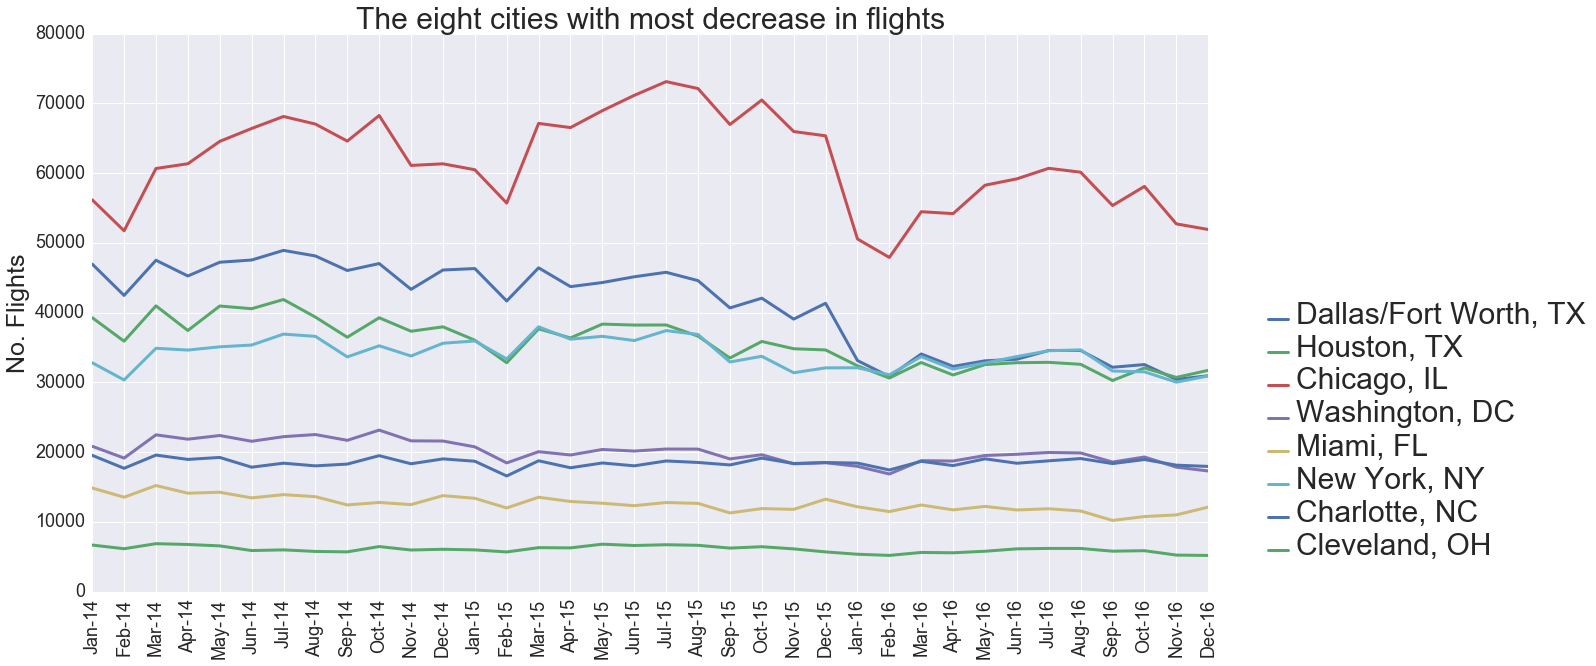

In [51]:
city_count_df.sort_values(by='difference', inplace=True)
city_count_df.reset_index(drop=True, inplace=True)
plotting_monthly_II(city_count_df, 8, 'City', 'No. Flights', 'The eight cities with most decrease in flights', 
                    'yes', 'decrease_cities')

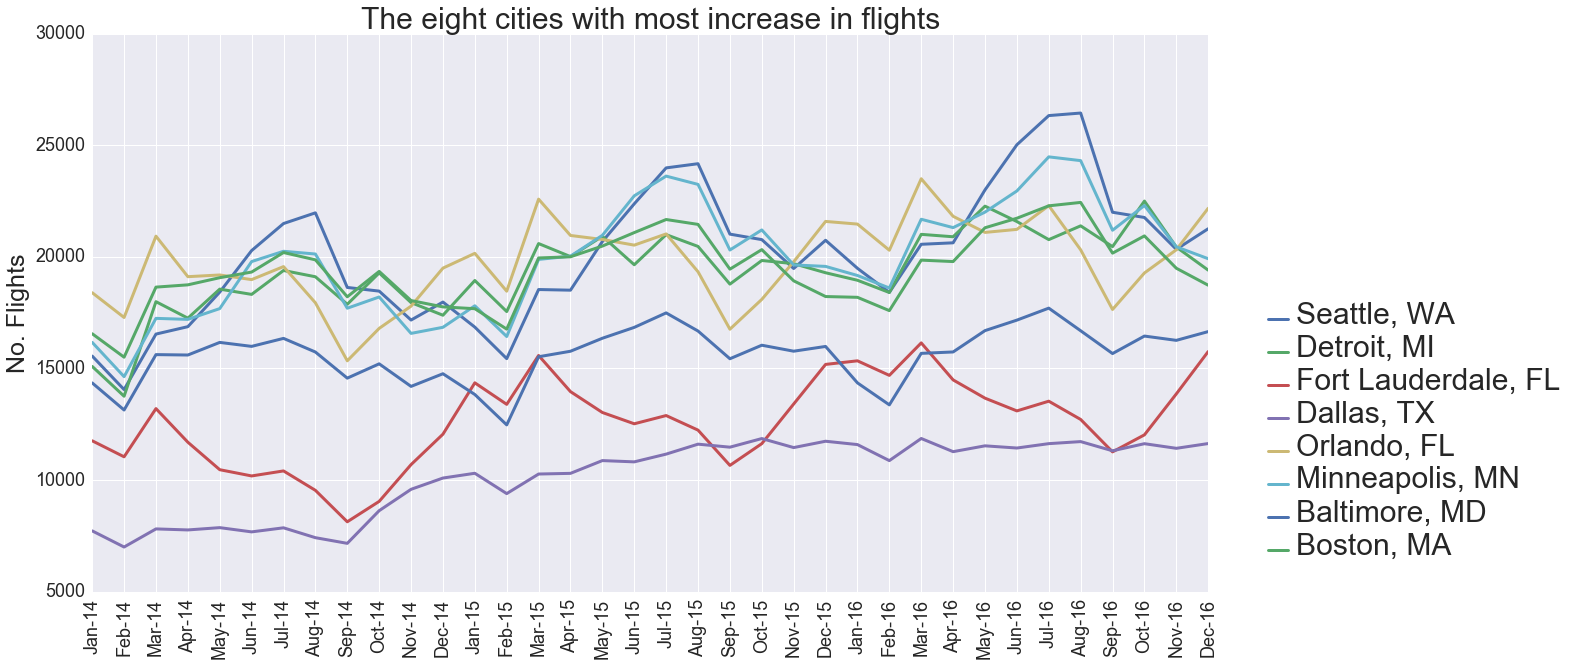

In [52]:
city_count_df.sort_values(by='difference', inplace=True, ascending=False)
city_count_df.reset_index(drop=True, inplace=True)
plotting_monthly_II(city_count_df, 8, 'City', 'No. Flights', 'The eight cities with most increase in flights', 
                    'yes', 'increase_cities')

### Route

In [53]:
routes_count_df['difference'] = 0
for i in range(len(routes_count_df)):
    routes_count_df['difference'][i]  = routes_count_df['36'][i] - routes_count_df['1'][i]

C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [54]:
routes_count_df.sort_values(by='difference', inplace=True)
routes_count_df.reset_index(drop=True, inplace=True)
plotting_monthly_II(routes_count_df, 8, 'Airports', 'No. Flights', 'The eight routes with most decrease in flights', 
                    'yes', 'decrease_routes')

In [55]:
routes_count_df.sort_values(by='difference', inplace=True, ascending=False)
routes_count_df.reset_index(drop=True, inplace=True)
plotting_monthly_II(routes_count_df, 8, 'Airports', 'No. Flights', 'The eight routes with most increase in flights', 
                    'yes', 'increase_flights')